In [3]:
import numpy as np
import matplotlib.pyplot as plot

def rule3(un_A, un_B):
    dQ = np.sqrt((un_A**2)+(un_B**2))
    return dQ

def rule4(Q, un_A, un_B, A, B, cA, cB):
    dQ = np.abs(Q) * np.sqrt(((cA*un_A/A)**2) + ((cB*un_B/B)**2))
    return dQ

def brute(A, un_A):
    lndA = np.abs(np.log(np.average(A)) - np.log(np.average(A) + un_A))
    return lndA


In [5]:
#measurements, volts and radius in list with volts in first position

v7 = [10.74, 0.07]
v65 = [10.61, 0.065]
v6 = [10.37, 0.06]
v55 = [10.2, 0.055]
v5 = [10.07, 0.05]
v45 = [9.84, 0.045]
v4 = [9.42, 0.04]
v35 = [9.36, 0.035]
v3 = [9.02, 0.03]
v25 = [8.68, 0.025]
v2 = [8.36, 0.02]
v15 = [7.43, 0.015]
v1 = [6.90, 0.010]

r_un = 0.0005 #uncertainty in radius
V_un = 0.05 #uncertainty in volts



In [51]:
v_array = np.array([v7[0], v65[0], v6[0], v55[0], v5[0], v45[0], v4[0], v35[0], v3[0], v25[0], v2[0], v15[0], v1[0]])

r_array = np.array([v7[1], v65[1], v6[1], v55[1], v5[1], v45[1], v4[1], v35[1], v3[1], v25[1], v2[1], v15[1], v1[1]])

dV = np.diff(v_array)
un_dV = rule3(V_un, V_un)
print('The change in volts between each measurement is', dV, 'with an uncertainty of +/- %.2f' % un_dV, 'volts')
print()

dr = np.diff(r_array) * (-1)
un_dr = rule3(r_un, r_un)
print('The change in radius was a constant', dr[11:], 'with an uncertainty of +/- %.4f meters' % un_dr)
print()

efield = ((-1*dV) / dr)
un_efield = rule4(efield, un_dV, un_dr, dV, dr, 1, 1)
b = []
for i in un_efield:
    a = '%.2f' % i
    b.append(a)
print('The efields between each measurement are', efield, ' with an uncertainty of +/-', b, 'Volts/meter')
print()

rmid = (.5 * (r_array[1:] + r_array[:-1]))
un_rmid =.5 * rule3(r_un, r_un)
print('The averages of the radii are as follows', rmid, '+/- %.4f' % un_rmid, 'meters')
print()

lnefield = np.log(efield)
lnefieldp = np.around(lnefield, 2)
un_lnefield = brute(efield, un_efield)
un_lnefieldp = np.around(un_lnefield, 2)
print('The natural log of efields are', lnefieldp, '+/-', un_lnefieldp, 'volts/meter')
print()

lnrmid = np.log(rmid)
lnrmidp = np.around(lnrmid, 2)
un_lnrmid = brute(rmid, un_rmid)
un_lnrmidp = np.around(un_lnrmid, 2)
print('The natural log of rmid is', lnrmidp, '+/-', un_lnrmidp, 'meters')
print()


The change in volts between each measurement is [-0.13 -0.24 -0.17 -0.13 -0.23 -0.42 -0.06 -0.34 -0.34 -0.32 -0.93 -0.53] with an uncertainty of +/- 0.07 volts

The change in radius was a constant [0.005] with an uncertainty of +/- 0.0007 meters

The efields between each measurement are [ 26.  48.  34.  26.  46.  84.  12.  68.  68.  64. 186. 106.]  with an uncertainty of +/- ['14.61', '15.69', '14.94', '14.61', '15.57', '18.47', '14.24', '17.10', '17.10', '16.79', '29.87', '20.61'] Volts/meter

The averages of the radii are as follows [0.0675 0.0625 0.0575 0.0525 0.0475 0.0425 0.0375 0.0325 0.0275 0.0225
 0.0175 0.0125] +/- 0.0004 meters

The natural log of efields are [3.26 3.87 3.53 3.26 3.83 4.43 2.48 4.22 4.22 4.16 5.23 4.66] +/- [0.21 0.22 0.21 0.21 0.22 0.25 0.2  0.24 0.24 0.23 0.38 0.28] volts/meter

The natural log of rmid is [-2.7  -2.77 -2.86 -2.95 -3.05 -3.16 -3.28 -3.43 -3.59 -3.79 -4.05 -4.38] +/- 0.01 meters



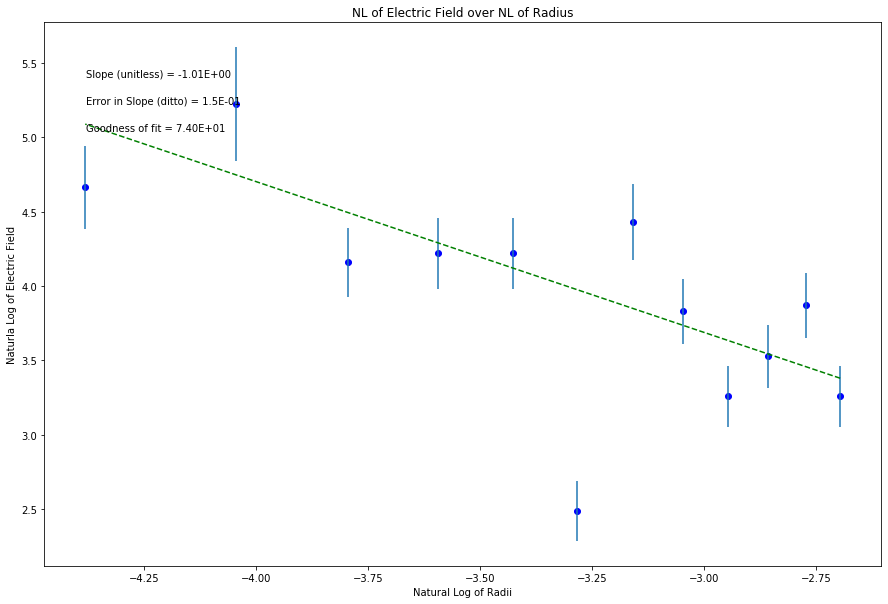

In [52]:
x = lnrmid 
y = lnefield
dy = un_lnefield  

b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

fit = b+m*x

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#goodness of fit
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)


plot.figure(figsize=(15,10))
 
plot.plot(x, fit, color='green', linestyle='--')
plot.scatter(x, y, color='blue', marker='o')
 
plot.xlabel('Natural Log of Radii')
plot.ylabel('Naturla Log of Electric Field')
plot.title('NL of Electric Field over NL of Radius')
 
plot.errorbar(x, y, yerr=dy, xerr=None, fmt="none") 
 
plot.annotate('Slope (unitless) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plot.annotate('Error in Slope (ditto) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plot.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plot.show()